<div class="alert alert-block alert-info",align="center">
    
# ***Wildfire activities in Australia***                                     
### `DATA VISUALIZATION`
</div>

In [1]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.


`*Importing the required libraries*`

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

### `Dataset`

**Historical Wildfires**

This wildfire dataset contains data on fire activities in Australia starting from 2005. Additional information can be found [here](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/c6-mcd14dl).


In [3]:
df=pd.read_csv("Historical_Wildfires.csv")
print("Data read into a pandas dataframe!")

Data read into a pandas dataframe!


In [4]:
df.head(10)

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.680000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.611250,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.520000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.264000,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.400000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R
5,NSW,1/9/2005,13.721429,314.757143,64.542857,83.142857,6.175990,38.142857,7,R
6,NSW,1/10/2005,16.625455,324.800000,58.554545,91.454545,6.088738,37.072727,11,R
7,NSW,1/11/2005,32.784375,318.446875,66.812500,91.000000,10.132456,102.666667,16,R
8,NSW,1/12/2005,16.486154,323.238462,40.607692,87.769231,8.623165,74.358974,13,R
9,NSW,1/13/2005,42.640000,325.376667,87.573333,86.666667,7.499206,56.238095,15,R


In [5]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

In [6]:
import datetime as dt

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month


In [7]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,2005,1
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,2005,1
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,2005,1
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,2005,1
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,2005,1


In [8]:
print(df.dtypes)

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
Year                                     int32
Month                                    int32
dtype: object


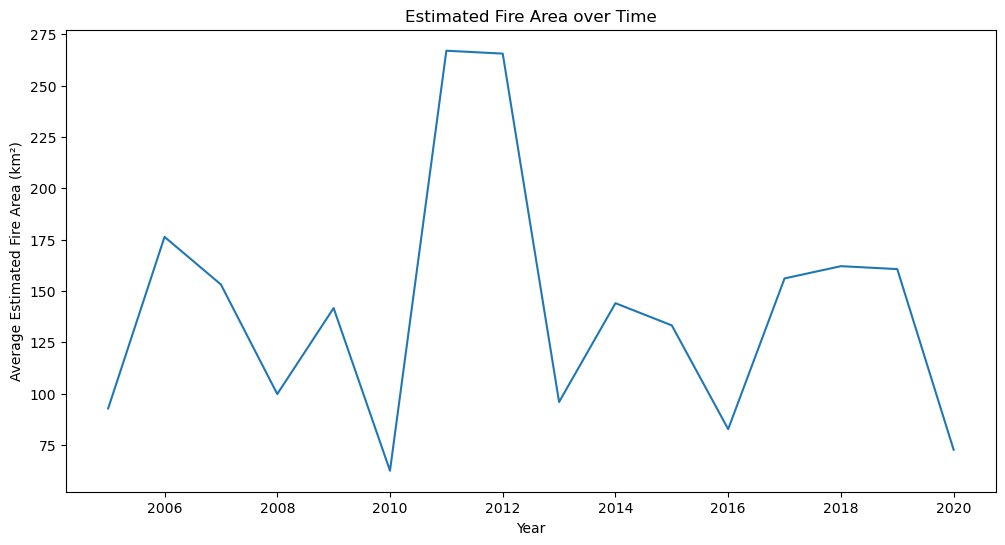

In [9]:
#Using pandas for plotting
plt.figure(figsize=(12, 6))
# Grouping the data by 'Year' and calculating the mean of 'Estimated_fire_area'
df_new = df.groupby('Year')['Estimated_fire_area'].mean()
# Plotting the data
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

*We can see a hike in the range 2010-2013* </br>
> So let's plot the line graph with months along with year on X axis

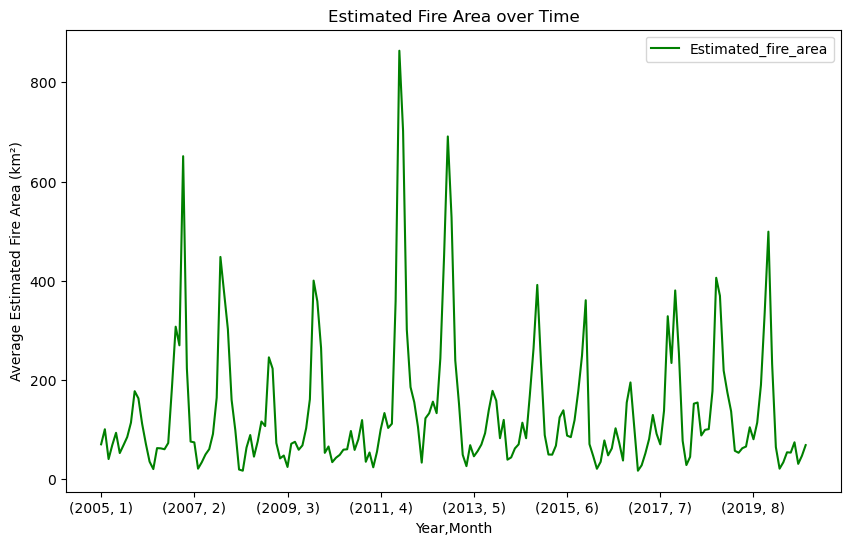

In [10]:
plt.figure(figsize=(10,6))
df_new1=df.groupby(["Year","Month"])["Estimated_fire_area"].mean()
df_new1.plot(x=df_new1.index,y=df_new1.values,color="g")
plt.xlabel("Year,Month")
plt.ylabel("Average Estimated Fire Area (km²)")
plt.title("Estimated Fire Area over Time")
plt.legend()
plt.show()

`Let's have an insight on the distribution of mean estimated fire brightness across the regions`

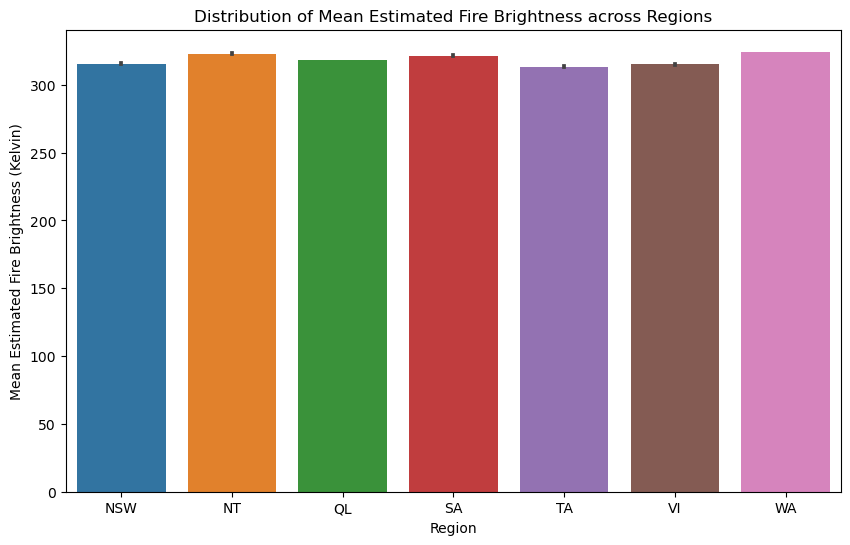

In [11]:
plt.figure(figsize=(10, 6))
# Using seaborn's barplot function to create the plot
sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()

`Let's find the portion of count of pixels for presumed vegetation fires vary across regions` 

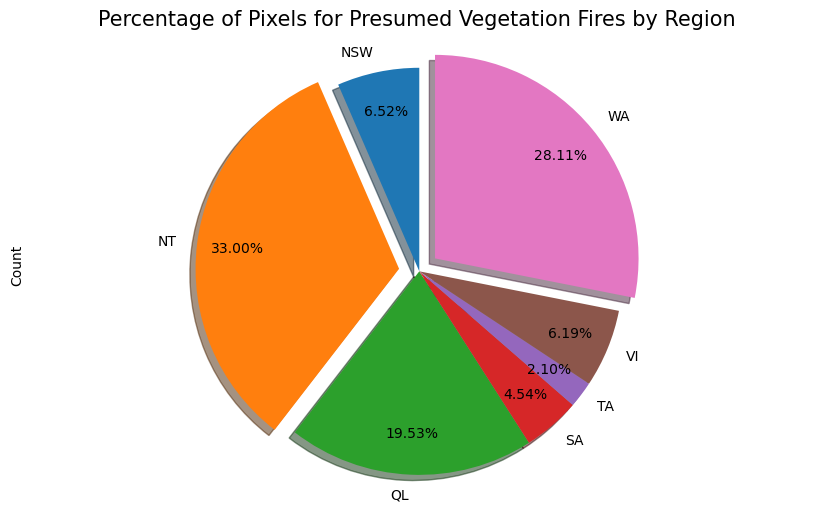

In [12]:
plt.figure(figsize=(10, 6))
df_new3=df.groupby(["Region"])["Count"].mean()
explode_list=[0,0.1,0,0,0,0,0.1]
df_new3.plot(kind="pie",autopct="%1.2f%%",startangle=90,pctdistance=0.8,shadow=True,explode=explode_list,fontsize=10)
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region',fontsize=15)
plt.axis('equal')
plt.show()

### We can see that the major portion of the Pixels is in the following regions:-
   * NT
   * WA
   * QL

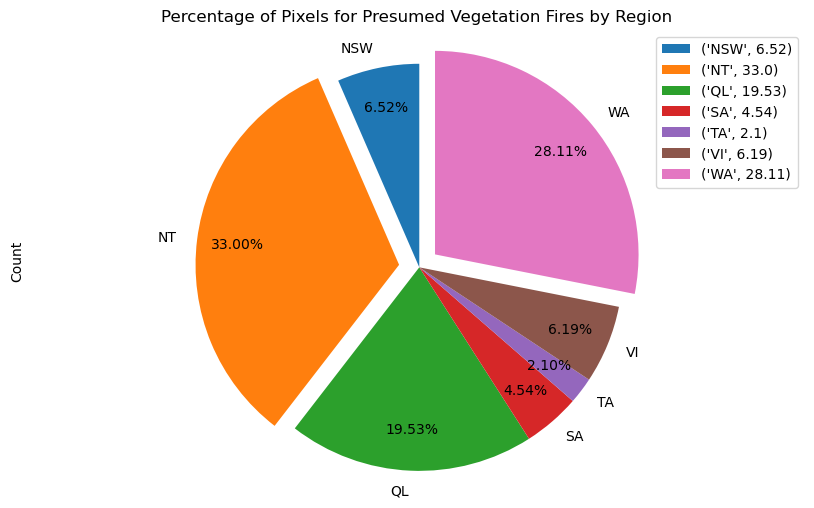

In [13]:
plt.figure(figsize=(10, 6))
df_new3=df.groupby(["Region"])["Count"].mean()
explode_list=[0,0.1,0,0,0,0,0.1]
df_new3.plot(kind="pie",autopct="%1.2f%%",startangle=90,pctdistance=0.8,explode=explode_list)
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.legend([(i,round(k/df_new3.sum()*100,2)) for i,k in zip(df_new3.index, df_new3)])
plt.axis('equal')
plt.show()

> Let's develop a histogram of the mean estimated fire brightness

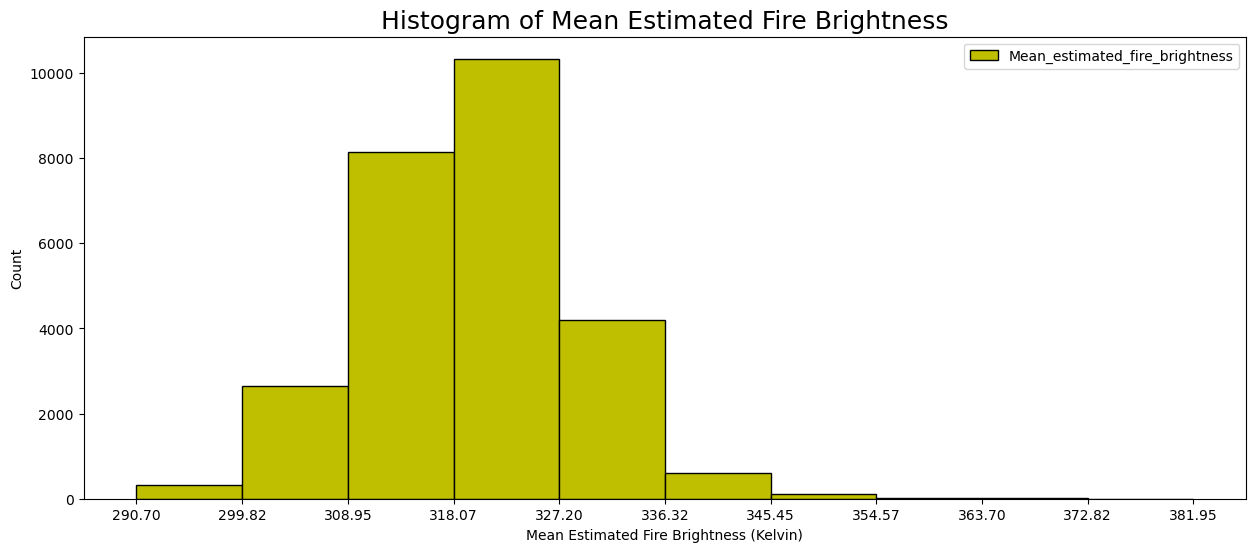

In [14]:
plt.figure(figsize=(15, 6))
count,bin_edges=np.histogram(df['Mean_estimated_fire_brightness'],10)
df_new4=df['Mean_estimated_fire_brightness']
df['Mean_estimated_fire_brightness'].map(int)
df_new4.plot(kind="hist",xticks=bin_edges,bins=10,edgecolor="black",color="y")
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness',fontsize=18)
plt.legend()
plt.show()

`Let's understand the distribution of estimated fire brightness across regions`

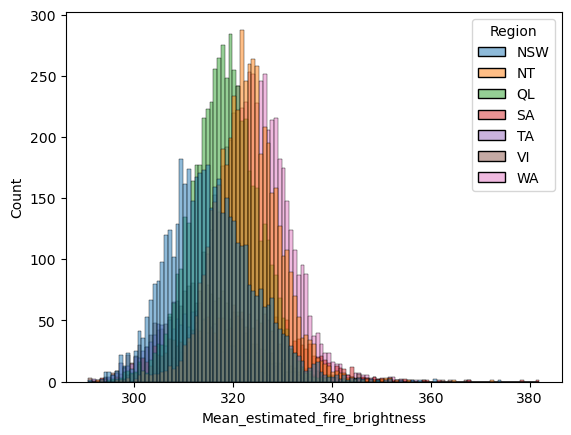

In [15]:
sns.histplot(x=df["Mean_estimated_fire_brightness"],data=df,hue="Region")
plt.show()

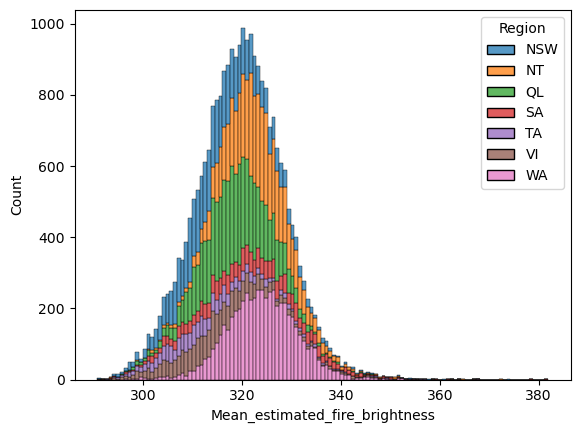

In [16]:
#For stacked histplot
sns.histplot(x=df["Mean_estimated_fire_brightness"],data=df,hue="Region",multiple="stack")
plt.show()

`Finding the correlation between 'Mean_confidence' and 'Mean_estimated_fire_radiative_power'`

In [17]:
df[["Mean_confidence","Mean_estimated_fire_radiative_power"]].corr()

,Mean_confidence,Mean_estimated_fire_radiative_power
Mean_confidence,1.000000,0.452322
Mean_estimated_fire_radiative_power,0.452322,1.000000


> **Creating a scatter and regresssion plot for better clarity**

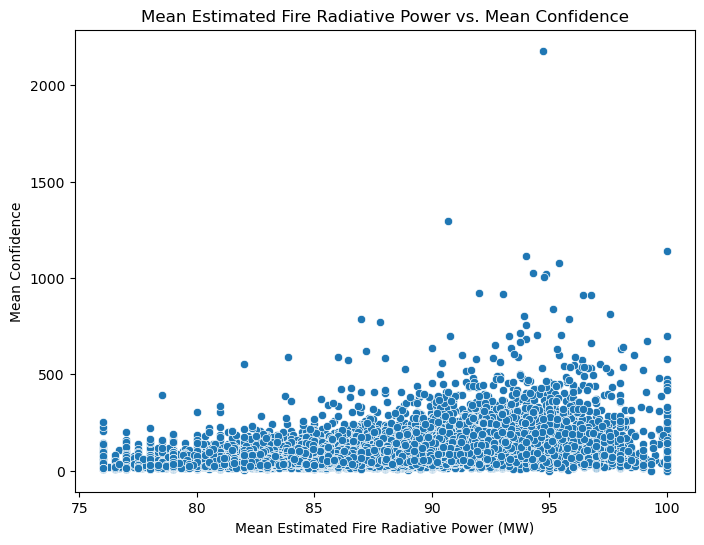

In [18]:
plt.figure(figsize=(8, 6))
    # Using sns.scatterplot to create the scatter plot
    # Specifying the DataFrame (data=df) and the columns for the x-axis (x='Mean_confidence') and y-axis            (y='Mean_estimated_fire_radiative_power')
sns.scatterplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power')
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
plt.show()

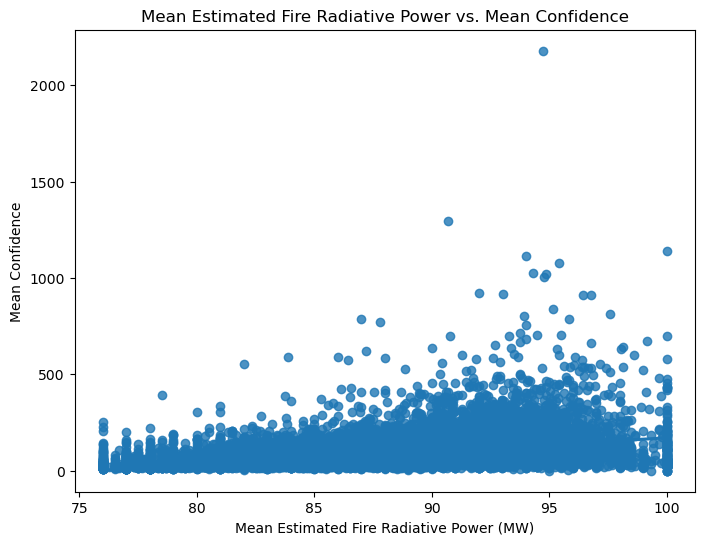

In [19]:
plt.figure(figsize=(8,6))
sns.regplot(x="Mean_confidence",y="Mean_estimated_fire_radiative_power",data=df)
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
plt.show()

`Let's mark these seven regions on the Map of Australia using Folium`

In [20]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [21]:
aus_reg = folium.map.FeatureGroup()

# Create a Folium map centered on Australia
Aus_map = folium.Map(location=[-25, 135], zoom_start=4)

# loop through the region and add to feature group
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
Aus_map.add_child(aus_reg)